In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.stats import linregress

import PythonGraphMod

slope is 28.969697
ax Ox intercept is -0.039121


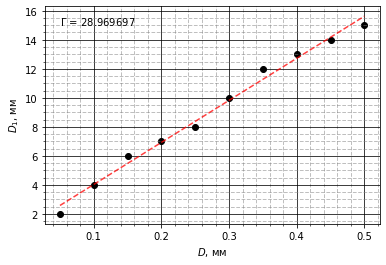

In [47]:
# Полцчаем файловый дескриптор файла с данными
SW_L_df = pd.read_excel("../data/slot_width_lense.ods")

# импортируем эксперементальные данные в np массивы
SW_L_D = np.array(SW_L_df['D'])
SW_L_D = SW_L_D / 1000 # переводим мкм -> мм
SW_L_D1 = np.array(SW_L_df['D1'])

# построим график зависимости D1(D)
# используем функцию линейной регрессии
lin_lense = linregress(SW_L_D, SW_L_D1)

fig1, ax1 = PythonGraphMod.CreateSimpleGraph()

ax1.scatter(SW_L_D, SW_L_D1, color='black', marker='o', alpha=1)
ax1.plot(SW_L_D, lin_lense.intercept + lin_lense.slope * SW_L_D, color='red', alpha=0.75, lw=1.5, ls='--', label='lense')
#####################################
# lin_lense.slope -- наклон графика #
#####################################
print('slope is %f' %lin_lense.slope)
print('ax Ox intercept is %f' %(-lin_lense.intercept/lin_lense.slope))


# сетка
ax1.minorticks_on()
ax1.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax1.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.text(0.05, 15, r'$\Gamma$ = %f' %lin_lense.slope)
plt.ylabel(r'$D_1$, мм')
plt.xlabel(r'$D$, мм')

fig1.savefig("../images/D_D1.pdf")

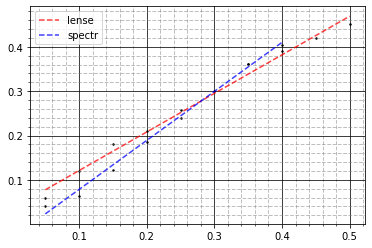

In [48]:
SW_S_df = pd.read_excel("../data/slot_width_spectr.ods")

SW_S_DS = np.array(SW_S_df['Ds'])
SW_S_D = np.array(SW_S_df['D'])
SW_S_D = SW_S_D / 1000

# Removing the wrond points
########################################
SW_S_DS = np.delete(SW_S_DS, [5, 8])  ##
SW_S_D = np.delete(SW_S_D, [5, 8])    ##
########################################

G1 = 33.29
G2 = 28.97

fig2, ax2 = PythonGraphMod.CreateSimpleGraph()

lin1 = linregress(SW_L_D, SW_L_D1/G1)
lin2 = linregress(SW_S_D, SW_S_DS)

ax2.scatter(SW_L_D, SW_L_D1/G1, color='black', s=2, marker='o', alpha=1)
ax2.scatter(SW_S_D, SW_S_DS, color='black', s=2, marker='o', alpha=1)
ax2.plot(SW_L_D, lin1.intercept + lin1.slope * SW_L_D, color='red', alpha=0.75, lw=1.5, ls='--', label='lense')
ax2.plot(SW_S_D, lin2.intercept + lin2.slope * SW_S_D, color='blue', alpha=0.75, lw=1.5, ls='--', label='spectr')

# сетка
ax2.minorticks_on()
ax2.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax2.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

plt.legend()

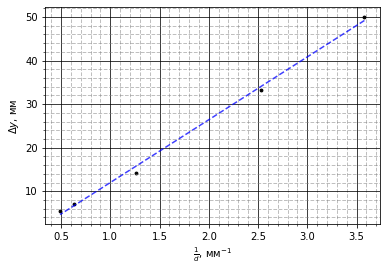

In [52]:
Delta_y = [3.58, 2.53, 1.26, 0.63, 0.49]
d = [0.02, 0.03, 0.07, 0.14, 0.18]

Delta_y = np.array(Delta_y)
d = np.array(d)
reverse_d = 1/d

fig3, ax3 = PythonGraphMod.CreateSimpleGraph()

lin = linregress(Delta_y, reverse_d)

ax3.scatter(Delta_y, reverse_d, color='black', s=8, marker='o', alpha=1)
ax3.plot(Delta_y, lin.intercept + lin.slope * Delta_y, color='blue', alpha=0.75, lw=1.5, ls='--', label='spectr')

# сетка
ax3.minorticks_on()
ax3.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax3.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel(r'$\Delta y$, мм')
plt.xlabel(r'$\frac{1}{d}$, мм$^{-1}$')

fig3.savefig("../images/Delta_y_d.pdf")